<h2> DataThon 2020 City Search Tool (Beginner)</h2>

<h3>Team Members<h3>
<li>John(Shih-Chiang) Wei</li><br>
<li>Sukanya Rammohan</li><br>
<li>Jung Hoon Seo</li>

<h2>Dataset</h2><br>
Crime: https://www.kaggle.com/mikejohnsonjr/united-states-crime-rates-by-county?select=crime_data_w_population_and_crime_rate.csv<br>
Temperature: https://www.ncdc.noaa.gov/ghcn/comparative-climatic-data https://data.world/gmoney/us-city-temp-ranges<br>
Educated: https://wallethub.com/edu/most-and-least-educated-cities/6656<br>
Covid19-info: Texas A&M University CS data science course<br>
Fast-Food: https://www.kaggle.com/datafiniti/fast-food-restaurants?select=Datafiniti_Fast_Food_Restaurants.csv<br>
Population Density: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-total-cities-and-towns.html<br>




<h2>Data preprocessing & cleaning</h2>

In [1]:
! git clone https://github.com/John-STJB/2020-TAMU-Datathon-City-Search-Tool.git


Cloning into '2020-TAMU-Datathon-City-Search-Tool'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 22 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (22/22), done.


In [2]:
import csv
import collections
import pandas as pd
import numpy as np

dic_total = collections.defaultdict(dict)
filename = "/content/2020-TAMU-Datathon-City-Search-Tool/Processor/uscitypopdensity.csv"

with open(filename, "r") as csvfile:
    csvreader = csv.reader(csvfile)
    i = 0
    for row in csvreader:
        if i != 0:
            dic_total[row[1].lower()]["Popluation_Density"] = row[3]
        i += 1

filename = "/content/2020-TAMU-Datathon-City-Search-Tool/Processor/farmers_markets_from_usda.csv"
with open(filename, "r") as csvfile:
    csvreader = csv.reader(csvfile)
    
    i = 0
    for row in csvreader:
        if i != 0 and row[0].lower() in dic_total:
            cnt = 0
            if "Markets_Numbers" not in dic_total[row[0].lower()]:
                for let in row[1:]:
                    if let == "Y":
                        cnt += 1
                dic_total[row[0].lower()]["Markets_Numbers"] = cnt  
        i += 1

filename = "/content/2020-TAMU-Datathon-City-Search-Tool/Processor/Most Educated Cities.csv"
with open(filename, "r") as csvfile:
    csvreader = csv.reader(csvfile)
    
    i = 0
    for row in csvreader:
        if i != 0:
            name = row[0]
            val = row[1]
            name = name.split(",")[0]
            for n in name.split("-"):
            #print(name)
                if n.lower() in dic_total:
                    dic_total[n.lower()]["Educated_Score"] = val
                    #print(dic_total[n.lower()]["Educated_Score"])
        else:
            i += 1


filename = "/content/2020-TAMU-Datathon-City-Search-Tool/Processor/FastFood.csv"
with open(filename, "r") as csvfile:
    csvreader = csv.reader(csvfile)      
    i = 0
    for row in csvreader:
        if i != 0:
            name = row[0].lower()
            if name in dic_total:
                if "Fastfood_Restaurant_Numbers" not in dic_total[name]:
                    dic_total[name]["Fastfood_Restaurant_Numbers"] = 1
                else:
                    dic_total[name]["Fastfood_Restaurant_Numbers"] += 1
        i += 1


key = list(dic_total.keys())
for k in key:
    if len(dic_total[k]) != 4:
        del dic_total[k]
#print(len(dic_total))



key = ["CityName","Popluation_Density","Markets_Numbers","Educated_Score","Fastfood_Restaurant_Numbers"] 

filename = "/content/2020-TAMU-Datathon-City-Search-Tool/Processor/result.csv"
with open(filename, "w") as csvfile:
    csvwriter = csv.writer(csvfile)      
    
    csvwriter.writerow(key)

    for k, val in dic_total.items():
        row = [k]
        for feature in key[1:]:
            row.append(dic_total[k][feature])
        csvwriter.writerow(row)


In [3]:


dic_total = collections.defaultdict(list)

filename = "/content/2020-TAMU-Datathon-City-Search-Tool/Processor/result_v1.csv"
with open(filename, "r") as csvfile:
    csvreader = csv.reader(csvfile)
    i = 0
    for row in csvreader:
        if i == 0:
            keys = row
            i += 1
        else:
            name = row[1].lower()
            dic_total[name].append(row)

In [4]:
keys.append("Covid19_Confirmed_Numbers")
filename = "/content/2020-TAMU-Datathon-City-Search-Tool/Processor/time_series_covid19_confirmed_US.csv"
with open(filename, "r") as csvfile:
    csvreader = csv.reader(csvfile)
    i = 0
    visited = set()
    for row in csvreader:
        if i == 0:
            i += 1
        else:
            name = row[0].lower()
            if name in visited:
                continue
            visited.add(name)
            if name in dic_total:
                for i in range(len(dic_total[name])):
                    dic_total[name][i].append(row[1])
            #else:
                #print(name)

keys.append("Covid19_Deaths_Numbers")
filename = "/content/2020-TAMU-Datathon-City-Search-Tool/Processor/time_series_covid19_deaths_US.csv"
with open(filename, "r") as csvfile:
    csvreader = csv.reader(csvfile)
    i = 0
    visited = set()
    for row in csvreader:
        if i == 0:
            i += 1
        else:
            name = row[0].lower()
            if name in visited:
                continue
            visited.add(name)
            if name in dic_total:
                for i in range(len(dic_total[name])):
                    dic_total[name][i].append(row[1])




k = list(dic_total.keys())
cnt = 0
for l in k:
    #print(len(dic_total[l]))
    if len(dic_total[l][0]) != 8:
        x = len(dic_total[l][0])
        for i in range(len(dic_total[l])):
            for j in range(8-x):
                dic_total[l][i].append(" ")
    cnt += len(dic_total[l])
#print(cnt)



keys.append("Annual_Temperature")
filename = "/content/2020-TAMU-Datathon-City-Search-Tool/Processor/weather_sorted.csv"
with open(filename, "r") as csvfile:
    csvreader = csv.reader(csvfile)
    i = 0
    visited = set()
    for row in csvreader:
        if i == 0:
            i += 1
        else:
            name = row[1].lower()
            if name in visited:
                continue
            visited.add(name)
            if name in dic_total:
                for i in range(len(dic_total[name])):
                    dic_total[name][i].append(row[15])

k = list(dic_total.keys())
cnt = 0
for l in k:
    #print(len(dic_total[l]))
    if len(dic_total[l][0]) != 9:
        x = len(dic_total[l][0])
        for i in range(len(dic_total[l])):
            for j in range(9-x):
                dic_total[l][i].append(" ")
    cnt += len(dic_total[l])
#print(dic_total)
#print(cnt)



keys.append("Crime_Rate")
filename = "/content/2020-TAMU-Datathon-City-Search-Tool/Processor/crime_data_w_population_and_crime_rate.csv"
with open(filename, "r") as csvfile:
    csvreader = csv.reader(csvfile)
    i = 0
    visited = set()
    for row in csvreader:
        if i == 0:
            i += 1
        else:
            name = row[0]
            name = name.split(",")
            name = "".join(name).split(" ")[0]
            name = name.lower()
            if name in visited:
                continue
            visited.add(name)
            if name in dic_total:
                for i in range(len(dic_total[name])):
                    dic_total[name][i].append(row[1])

k = list(dic_total.keys())
cnt = 0
for l in k:
    #print(len(dic_total[l]))
    if len(dic_total[l][0]) != 10:
        x = len(dic_total[l][0])
        for i in range(len(dic_total[l])):
            for j in range(10-x):
                dic_total[l][i].append(" ")
    cnt += len(dic_total[l])
#print(dic_total)
#print(cnt)

filename = "/content/2020-TAMU-Datathon-City-Search-Tool/Processor/result_v2.csv"
with open(filename, "w") as csvfile:
    csvwriter = csv.writer(csvfile)      
    
    csvwriter.writerow(keys)

    for k, val in dic_total.items():
        
        for row in dic_total[k]:
            csvwriter.writerow(row)

<h3>Results after data preprocessing</h3>

In [5]:
data = pd.read_csv(filename)

data.head()

,CityName,County,Popluation_Density,Markets_Numbers,Educated_Score,Fastfood_Restaurant_Numbers,Covid19_Confirmed_Numbers,Covid19_Deaths_Numbers,Annual_Temperature,Crime_Rate
0,akron,Summit,3186,11,52.94,5,5073,248,,377.428833
1,albany,Albany,3034,0,65.14,13,3006,134,57.8,330.6781345
2,albuquerque,Bernalillo,2979,2,57.75,35,6198,170,,
3,alexandria,Calhoun,10367,15,81.70,19,3320,39,,689.8666258
4,allentown,lehigh,6863,13,46.59,2,5469,346,,259.65102


<h3>Applying KNN model to the dataset</h3><br>
The Concept is to apply K-NN algorithm to score each city by users input after we preprocess the dataset. Before training, We use the cluster method for each feature.

<h3>Extract Data</h3>

In [6]:
def parse_dataset(filename):
  data_set = []
  
  with open(filename, "r") as csvfile:
    csvreader = csv.reader(csvfile)
    i = 0
    for row in csvreader:
      if i == 0:
        features_list = row
        i += 1
        continue
      else:
        temp = []
        for i in range(len(row)):
          if i == 0 or i == 1 or row[i] == " ":
            temp.append(row[i])
          else:
            #print(row[i])
            temp.append(float(row[i]))
            
        data_set.append(temp[:])


    return data_set, features_list

dataset, features = parse_dataset("/content/2020-TAMU-Datathon-City-Search-Tool/After_preprocess_result.csv")
print(features)
for i in range(4):
  print(dataset[i])


['CityName', 'County', 'Popluation_Density', 'Markets_Numbers', 'Educated_Score', 'Fastfood_Restaurant_Numbers', 'Covid19_Confirmed_Numbers', 'Covid19_Deaths_Numbers', 'Annual_Temperature', 'Crime_Rate']
['akron', 'Summit', 3186.0, 11.0, 52.94, 5.0, 5073.0, 248.0, ' ', 377.428833]
['albany', 'Albany', 3034.0, 0.0, 65.14, 13.0, 3006.0, 134.0, 57.8, 330.6781345]
['albuquerque', 'Bernalillo', 2979.0, 2.0, 57.75, 35.0, 6198.0, 170.0, ' ', ' ']
['alexandria', 'Calhoun', 10367.0, 15.0, 81.7, 19.0, 3320.0, 39.0, ' ', 689.8666258]


Fisrt, we would modified the dataset in to ranking value based on mean and variance value for each feature.

In [7]:
import math
def cal_mean(data_set,n):
  mean = [0] * n
  real_count = [0] * n
  for data in data_set:
    for i in range(2,n):
      if data[i] != " ":
        real_count[i] += 1
        mean[i] += data[i]
  return mean, real_count

def cal_deviation(data_set, n, mean, real_count):
  deviation = [0] * n
  for data in data_set:
    for i in range(2,n):
      if data[i] != " ":
        deviation[i] += (data[i]-(mean[i]/real_count[i]))**2
  for i in range(2,n):
    deviation[i] = math.sqrt(deviation[i]/(real_count[i]-1))
    mean[i] = mean[i]/real_count[i]
  
  return mean, deviation


In [8]:
m_temp, real_count = cal_mean(dataset, len(features))
mean, deviation = cal_deviation(dataset, len(features), m_temp, real_count)
print(mean)
print(deviation)
print(real_count)


[0, 0, 4161.382352941177, 11.305882352941177, 53.091999999999956, 14.31764705882353, 16063.35582822086, 403.5766871165644, 66.88787878787879, 498.24679358762603]
[0, 0, 3585.121001108071, 9.742268704603894, 14.750817993565308, 15.075911869312044, 35699.12394050474, 886.5065498404086, 8.907537453463135, 247.6429895100989]
[0, 0, 170, 170, 170, 170, 163, 163, 33, 139]


Define the clustering critiria (roughly apaply normal distribution)

value > mean + 1.5dev: high = 3

value in mean +/- 1.5dev: med = 2

value in mean-1.5dev ~ mean-3dev: low = 1

value < mean-3dev: None = 0


In [9]:
def criteria(val, mean, dev):
  if val < mean-2*dev:
    return 0
  elif mean-2*dev <= val < mean-0.4*dev:
    return 1
  elif mean-0.4*dev <= val < mean+0.5*dev:
    return 2
  elif mean+0.5*dev <= val < mean+1*dev:
    return 3
  else:
    return 4

def transform_data(x, mean, dev):

  for i in range(len(x)):
    for j in range(len(x[0])):
      if x[i][j] != " ":
        x[i][j] = criteria(x[i][j],mean[j],dev[j])
  return x



x = [data[2:] for data in dataset]

X = transform_data(x, mean[2:], deviation[2:])
print(X)
print(len(X))
print(features)


[[2, 2, 2, 1, 2, 2, ' ', 1], [2, 1, 3, 2, 2, 2, 1, 1], [2, 1, 2, 4, 2, 2, ' ', ' '], [4, 2, 4, 2, 2, 1, ' ', 3], [3, 2, 1, 1, 2, 2, ' ', 1], [2, 1, 1, 1, 2, 2, ' ', 1], [3, 2, 2, 2, 4, 3, ' ', 3], [1, 1, 2, 4, 4, 3, ' ', 3], [1, 3, 2, 1, 2, 1, 0, 4], [1, 1, 2, 2, 1, 1, ' ', 2], [2, 4, 4, 1, 2, 2, ' ', 1], [2, 2, 2, 2, 3, 2, ' ', 2], [1, 1, 2, 3, 3, 2, ' ', 2], [1, 4, 2, 1, 2, 2, ' ', 1], [2, 4, 4, 4, 1, 1, ' ', 1], [1, 4, 0, 1, 2, 2, ' ', 2], [3, 1, 3, 1, 2, 2, 2, 4], [2, 4, 3, 1, 1, 1, ' ', 2], [1, 3, 2, 2, 1, 1, ' ', 2], [4, 4, 4, 2, 2, 3, ' ', 1], [2, 1, 2, 1, 2, 2, ' ', 2], [4, 2, 4, 1, 2, 4, ' ', 3], [2, 1, 1, 2, 2, 4, ' ', 3], [1, 1, 0, 1, 1, 1, ' ', 1], [1, 2, 0, 2, 1, 1, ' ', 1], [3, 2, 2, 1, 2, 2, 1, 2], [4, 1, 2, 1, 1, 1, ' ', 1], [2, 2, 3, 1, 3, 2, ' ', ' '], [2, 3, 3, 2, 3, 2, ' ', ' '], [1, 2, 2, 1, 1, 1, ' ', 3], [1, 4, 1, 2, 1, 1, ' ', 3], [2, 2, 2, 4, 1, 1, ' ', 3], [1, 1, 2, 2, 1, 1, ' ', 3], [2, 4, 4, 1, ' ', ' ', ' ', ' '], [1, 4, 2, 2, 2, 2, 2, 2], [2, 1, 2, 2, 2, 2

Then according to the user's input, we transform
ranking in to numerical value and calculate the distance_norm2 between user_input and X

In [10]:
label = ["Score"] + features
def cal_norm2(X, user):
  cal = 0
  for i in range(len(X)):
    if X[i] != " ":
      cal += (X[i]-user[i])**2
  return cal**0.5


We are going to apply K-NN algorithm concept, calculate score for each city.



In [11]:
#@title Rate importance of each of the following factors


Popluation_Density = "Med" #@param ["None", "Low", "Med", "High", "very High"]
Markets_Numbers = "None" #@param ["None", "Low", "Med", "High", "very High"]
Educated_Score = "None" #@param ["None", "Low", "Med", "High", "very High"]
Fastfood_Restaurant_Numbers = "None" #@param ["None", "Low", "Med", "High", "very High"]
Covid19_Confirmed_Numbers = "very High" #@param ["None", "Low", "Med", "High", "very High"]
Covid19_Deaths_Numbers = "None" #@param ["None", "Low", "Med", "High", "very High"]
Annual_Temperature = "Low" #@param ["None", "Low", "Med", "High", "very High"]
Crime_Rate = "Med" #@param ["None", "Low", "Med", "High", "very High"]

weights = [
  Popluation_Density,
  Markets_Numbers,
  Educated_Score,
  Fastfood_Restaurant_Numbers,
  Covid19_Confirmed_Numbers,
  Covid19_Deaths_Numbers,
  Annual_Temperature,
  Crime_Rate
]

replace = {'None': 0, 'Low': 1, 'Med': 2, 'High': 3, "very High": 4}
user_input = [replace[w] for w in weights]


result = []
for i in range(len(X)):
  score_each_cites = cal_norm2(X[i],user_input)
  #score.append(10-score_each_cites)
  result.append([10-score_each_cites] + dataset[i])


result.sort(reverse=True)


#print(features)
#for i in range(len(result)):
#  print(result[i])





Actually, we implemented K = 1 because each of city is a different catogoric. And we can visualize the K=1 K-NN algorithm concept through the follow figure.The vertex showing the decision boundary.

<h2>Visualization (Example) </h2>

Using Tufte's principles of graphical excellence: "complex ideas communicated with clarity, precision, and efficiency."

This is just an example of plotting. Here we only used two features, but the reality it is 8 demensions. Since we cannot draw 8-dimensional graph, we just show you a sample output to describe the process

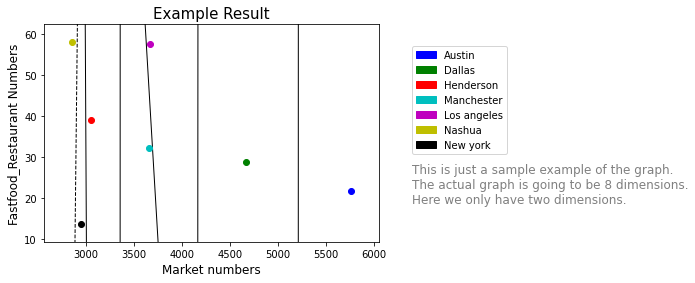

In [12]:
# use only two of those features in order to plot a 2-d figure into a Voronoi diagram
# use 40 points just for a demo
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.patches as mpatches
train_x_2d = [[tmp[3], tmp[5]] for tmp in result[:7]]

vor = Voronoi(train_x_2d)
voronoi_plot_2d(vor, show_vertices = False)

color = ["b","g","r","c","m","y","k"]
index = 0
for i in range(len(train_x_2d)):
  plt.plot([train_x_2d[i][0]], [train_x_2d[i][1]], color[i%7]+'o')

plt.title("Example Result",fontsize=15)
plt.xlabel("Market numbers",fontsize=12)
plt.ylabel("Fastfood_Restaurant Numbers",fontsize=12)

b_patch = mpatches.Patch(color='b', label='Austin')
g_patch = mpatches.Patch(color='g', label='Dallas')
r_patch = mpatches.Patch(color='r', label='Henderson')
c_patch = mpatches.Patch(color='c', label='Manchester')
m_patch = mpatches.Patch(color='m', label='Los angeles')
y_patch = mpatches.Patch(color='y', label='Nashua')
k_patch = mpatches.Patch(color='k', label='New york')

plt.legend(handles=[b_patch,g_patch,r_patch,c_patch,m_patch,y_patch,k_patch], bbox_to_anchor=(1.10, .9), loc='upper left', borderaxespad=0.)
plt.annotate('This is just a sample example of the graph.\nThe actual graph is going to be 8 dimensions.\nHere we only have two dimensions.', xy=(1.10, .18), fontsize =12, color = 'gray', xycoords='axes fraction')
plt.show()

<h2>Result</h2>

In [13]:
final_top_fives = []

for i in range (0,5):
    final_top_fives.append((result[i])[1])

<h3>Users can consider 8 features</h3>

<h4>Popluation_Density<br><br>Markets_Numbers<br><br>Educated_Score<br><br>Fastfood_Restaurant_Numbers<br><br>
Covid19_Confirmed_Numbers<br><br>Covid19_Deaths_Numbers<br><br>Annual_Temperature<br><br>Crime_Rate</h4>

<h4>Consider Level: None | Low | Medium | High | Very High <br></h4>

<h4>In this example, we assumed users chose:<br></h4>


<li>Popluation_Density = "Medium" </li>
<li>Markets_Numbers = "None" </li>
<li>Educated_Score = "None" </li>
<li>Fastfood_Restaurant_Numbers = "None" </li>
<li>Covid19_Confirmed_Numbers = "very High" </li>
<li>Covid19_Deaths_Numbers = "None" </li>
<li>Annual_Temperature = "Low" </li>
<li>Crime_Rate = "Med" </li>



In [14]:
print("We are going to give top 5 cities as suggestions: ")
print(final_top_fives)

We are going to give top 5 cities as suggestions: 
['modesto', 'fresno', 'scranton', 'san bernardino', 'roseville']


Thank you.